<a href="https://colab.research.google.com/github/aswinpm007/data/blob/master/supremecourtjudgements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Named Entity Recognition (NER) in Legal Case Summaries
Purpose
Named Entity Recognition (NER) is a key technique in Natural Language Processing (NLP) that automatically identifies and classifies named entities in text into predefined categories such as persons, organizations, locations, dates, legal terms, laws, court names, and more. In the context of legal case summaries, the purpose of applying NER is to automatically extract critical legal information that can help in understanding, organizing, and analyzing legal documents. This automated extraction saves time and resources, as manual review of legal cases can be highly time-consuming and error-prone.

In [27]:

import pandas as pd
import spacy

In [7]:

df = pd.read_csv('/content/judgement.csv')
df

,Case ID,Case Summary,Judgment Outcome
0,1,The defendant challenges the evidence admissib...,Reversed
1,2,The petitioner argues that the tax law violate...,Affirmed
2,3,The accused claims that the search and seizure...,Reversed
3,4,The appellant contests the sufficiency of evid...,Affirmed
4,5,The plaintiff argues the right to privacy was ...,Reversed
...,...,...,...
195,196,The defendant claims that the prosecution enga...,Reversed
196,197,The petitioner claims that a ruling violates t...,Affirmed
197,198,The plaintiff argues that the court's decision...,Reversed
198,199,The defendant contests the sentencing as cruel...,Affirmed


In [8]:
df.tail()

,Case ID,Case Summary,Judgment Outcome
195,196,The defendant claims that the prosecution enga...,Reversed
196,197,The petitioner claims that a ruling violates t...,Affirmed
197,198,The plaintiff argues that the court's decision...,Reversed
198,199,The defendant contests the sentencing as cruel...,Affirmed
199,200,The petitioner claims that a ruling on police ...,Reversed


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Case ID           200 non-null    int64 
 1   Case Summary      200 non-null    object
 2   Judgment Outcome  200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [11]:
df.describe()

,Case ID
count,200.000000
mean,100.500000
std,57.879185
min,1.000000
25%,50.750000
50%,100.500000
75%,150.250000
max,200.000000


In [12]:
df.isnull().sum()

,0
Case ID,0
Case Summary,0
Judgment Outcome,0


In [13]:
df.duplicated().sum()


0

In [14]:
nlp = spacy.load('en_core_web_sm')

In [15]:
def extract_legal_entities(text):

    doc = nlp(text)


    legal_entities = []

    for ent in doc.ents:

        if ent.label_ in ['PERSON', 'ORG', 'GPE', 'LAW', 'NORP']:
            legal_entities.append(ent.text)

    return legal_entities


In [22]:
print(df['Case Summary'][0])


The defendant challenges the evidence admissibility based on procedural errors.


In [23]:
case_summary = df['Case Summary'][0]
case_summary = case_summary.strip()
doc = nlp(case_summary)


In [24]:
print(doc)

The defendant challenges the evidence admissibility based on procedural errors.


In [25]:
for token in doc:
    print(token.text, token.pos_, token.dep_)


The DET det
defendant NOUN nsubj
challenges VERB ROOT
the DET det
evidence NOUN compound
admissibility NOUN dobj
based VERB prep
on ADP prep
procedural ADJ amod
errors NOUN pobj
. PUNCT punct


In [26]:
if doc.ents:
    for ent in doc.ents:
        print(ent.text, ent.label_)
else:
    print("No entities found")


No entities found


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

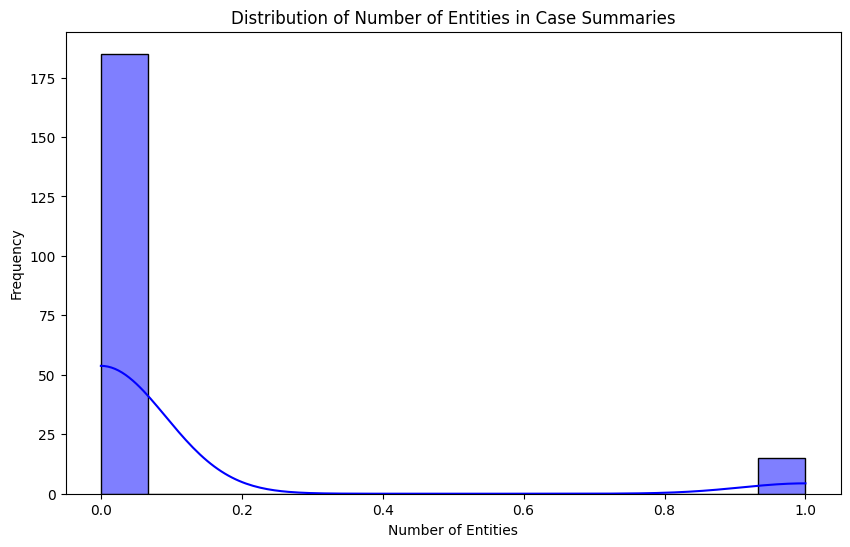

In [30]:
# Count the number of entities in each case summary
entity_counts_per_case = []

for summary in df['Case Summary']:
    doc = nlp(summary)
    entity_counts_per_case.append(len(doc.ents))

# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(entity_counts_per_case, kde=True, color='blue', bins=15)
plt.title('Distribution of Number of Entities in Case Summaries')
plt.xlabel('Number of Entities')
plt.ylabel('Frequency')
plt.show()


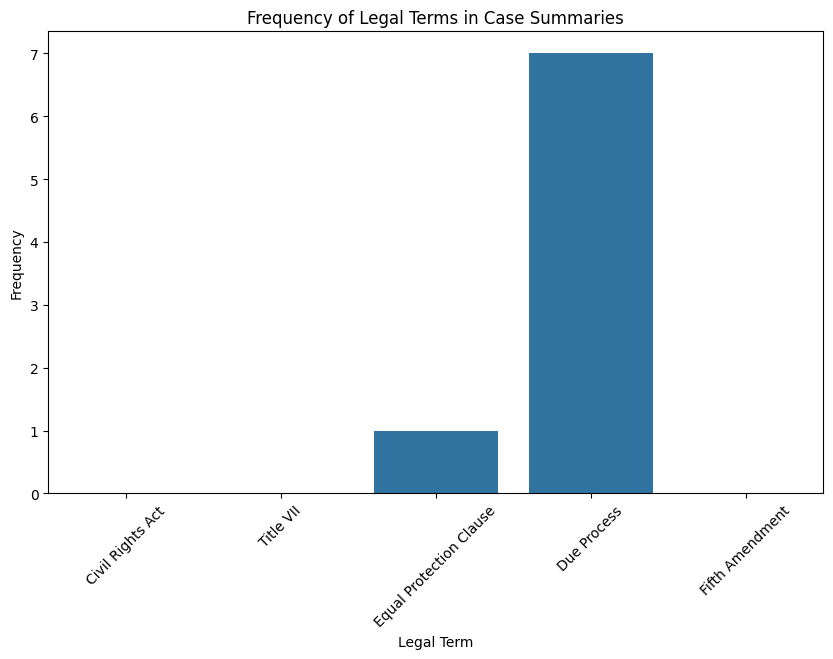

In [31]:

legal_terms = ["Civil Rights Act", "Title VII", "Equal Protection Clause", "Due Process", "Fifth Amendment"]


legal_term_counts = {term: 0 for term in legal_terms}

for summary in df['Case Summary']:
    for term in legal_terms:
        if term.lower() in summary.lower():
            legal_term_counts[term] += 1


legal_term_df = pd.DataFrame(legal_term_counts.items(), columns=['Legal Term', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Legal Term', y='Frequency', data=legal_term_df)
plt.title('Frequency of Legal Terms in Case Summaries')
plt.xlabel('Legal Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
